In [12]:
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
from specutils import Spectrum1D
quantity_support() 


<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x71574a377770>

In [50]:
#Load a fits spectra file from sdss with with loop
filename='spec-1678-53433-0001.fits'
with fits.open(filename) as f:
    specdata=f[1].data
    header_data=f[0].header



#fits_file=fits.open('spec-0548-51986-0001.fits')


In [51]:
#convert the log lam and flux to proper units 
lamb=10**specdata['loglam'] * u.AA
flux = specdata['flux'] * 10**-17 * u.Unit('erg cm-2 s-1 AA-1') 
#put the lamb and flux to the 1d specutils object
spectrum= Spectrum1D(spectral_axis=lamb, flux=flux)

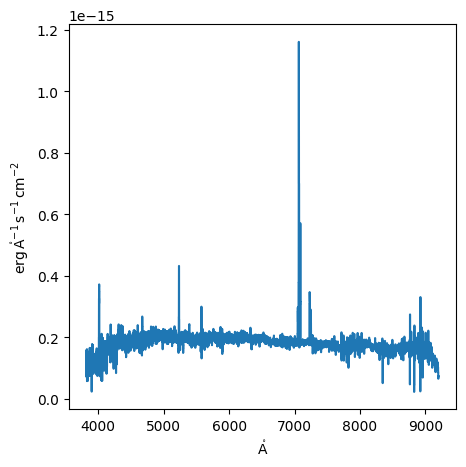

In [73]:
#plot the spectra
fig,ax=plt.subplots(figsize=(5,5))

ax.step( spectrum.spectral_axis, spectrum.flux)
fig.savefig(filename[:-5]+'spectra.jpg')

In [62]:
#Normaluse the continuum and find equivalent width of a given region 
from specutils.fitting import fit_generic_continuum
cont_norm_spec = spectrum / fit_generic_continuum(spectrum)(spectrum.spectral_axis) 

from specutils import SpectralRegion
from specutils.analysis import equivalent_width
width=equivalent_width(cont_norm_spec, regions=SpectralRegion(7060*u.AA, 7080*u.AA) )

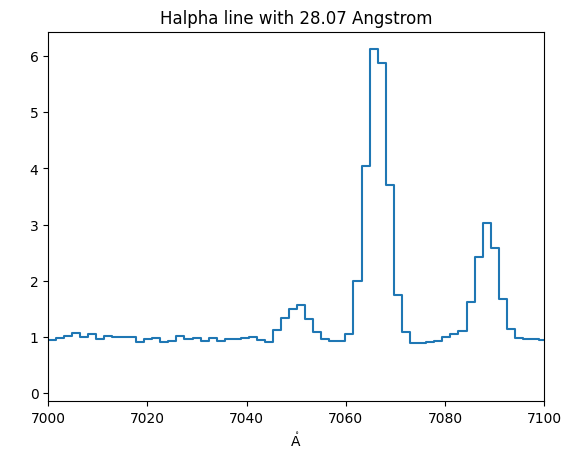

In [72]:
#PLot the region of Halpha and find its equivalent width
fig, ax=plt.subplots()
ax.step(cont_norm_spec.wavelength, cont_norm_spec.flux)
ax.set_xlim(7000*u.AA, 7100*u.AA)
ax.set_title('Halpha line with {:.2f}'.format(np.abs(width)))
fig.savefig(filename+'continum_normalise_Halpha.jpg')